In [102]:

from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,make_scorer,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from xgboost import XGBClassifier
import seaborn as sn 
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
import numpy as np
import sklearn
import seaborn as sns

In [121]:
data = pd.read_csv("Train_dataset.csv")
data = data[['smart_1_normalized','smart_3_normalized','smart_4_normalized',
'smart_5_normalized','smart_7_normalized','smart_9_normalized',
'smart_12_normalized', 'smart_183_normalized','smart_184_normalized','smart_187_normalized', 'smart_188_normalized',
'smart_189_normalized', 'smart_190_normalized', 'smart_193_normalized', 'smart_194_normalized',
'smart_197_normalized', 'smart_198_normalized', 'failure_actual_fail']]
x = data.drop(columns="failure_actual_fail")
y = data["failure_actual_fail"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [122]:
#Using the code from Benedict's SMOTE oversampling
#balance to 1:1
sm = SMOTE(random_state=3244,sampling_strategy = 1.0)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

#balance to 1:4
sm = SMOTE(random_state=3244,sampling_strategy = 0.25)
x_train_over1, y_train_over1 = sm.fit_resample(x_train, y_train)

#balance to 1:3 
sm = SMOTE(random_state=3244,sampling_strategy = (1/3))
x_train_over2, y_train_over2 = sm.fit_resample(x_train, y_train)

#balance to 1:2
sm = SMOTE(random_state=3244,sampling_strategy = 0.5)
x_train_over3, y_train_over3 = sm.fit_resample(x_train, y_train)

print(x_train_over.shape)
print(x_train_over1.shape)
print(x_train_over2.shape)
print(x_train_over3.shape)

(50044, 17)
(31277, 17)
(33362, 17)
(37533, 17)


In [129]:
# the MLPClassifier model: optimised to 3 layers.
model = MLPClassifier(solver = "adam", activation="relu", hidden_layer_sizes=(24,24,6), max_iter=250,random_state=111)


In [131]:
# no oversampling
base = model.fit(x_train,y_train)
pred_base = base.predict(x_test)


In [132]:
#1:1 oversample
mod0 = model.fit(x_train_over,y_train_over)
pred0 = mod0.predict(x_test)

In [133]:
#1:4 oversample
mod1 = model.fit(x_train_over1,y_train_over1)
pred1 = mod1.predict(x_test)

In [134]:
#1:3 oversample
mod2 = model.fit(x_train_over2,y_train_over2)
pred2 = mod2.predict(x_test)

In [135]:
#1:2 oversample
mod3 = model.fit(x_train_over3,y_train_over3)
pred3 = mod3.predict(x_test)

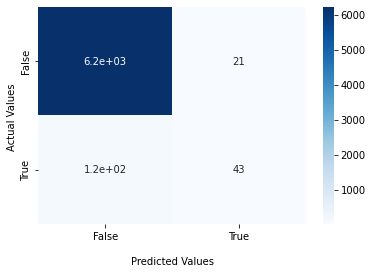

In [136]:
#Model without sampling methods
cf_matrix = confusion_matrix(y_test, pred_base)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

pyplot.show()

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

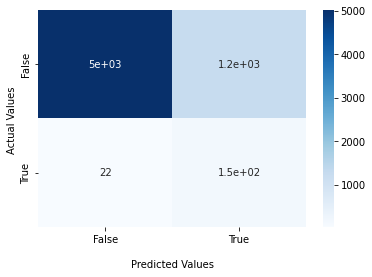

In [137]:
#1:1 balancing
cf_matrix = confusion_matrix(y_test, pred0)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

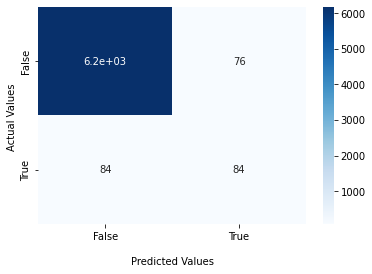

In [138]:
#1:4 balancing
cf_matrix = confusion_matrix(y_test, pred1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

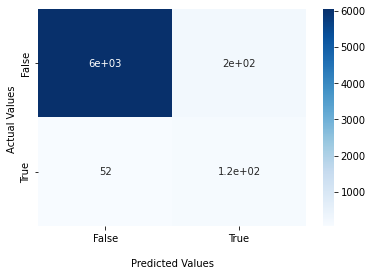

In [139]:
#1:3 balancing
cf_matrix = confusion_matrix(y_test, pred2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

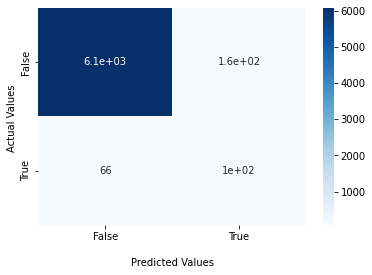

In [140]:
#1:2 balancing
cf_matrix = confusion_matrix(y_test, pred3)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [142]:
#balance to 1:1
sm = RandomUnderSampler(random_state=3244,sampling_strategy = 1.0)
x_train_under, y_train_under = sm.fit_resample(x_train, y_train)

#balance to 1:4
sm = RandomUnderSampler(random_state=3244,sampling_strategy = 0.25)
x_train_under1, y_train_under1 = sm.fit_resample(x_train, y_train)

#balance to 1:3 
sm = RandomUnderSampler(random_state=3244,sampling_strategy = (1/3))
x_train_under2, y_train_under2 = sm.fit_resample(x_train, y_train)

#balance to 1:2
sm = RandomUnderSampler(random_state=3244,sampling_strategy = 0.5)
x_train_under3, y_train_under3 = sm.fit_resample(x_train, y_train)

unique, count = np.unique(y_train_under3, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
print(y_train_dict_value_count)

{0: 1336, 1: 668}


In [143]:
#1:1 undersample
mod0 = model.fit(x_train_under,y_train_under)
pred0 = mod0.predict(x_test)

In [144]:
#1:4 undersample
mod1 = model.fit(x_train_under1,y_train_under1)
pred1 = mod0.predict(x_test)

In [145]:
#1:3 undersample
mod2 = model.fit(x_train_under2,y_train_under2)
pred2 = mod0.predict(x_test)

In [146]:
#1:2 undersample
mod3 = model.fit(x_train_under3,y_train_under3)
pred3 = mod0.predict(x_test)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

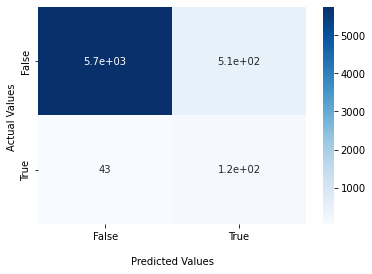

In [147]:
#1:1 balancing
cf_matrix = confusion_matrix(y_test, pred0)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

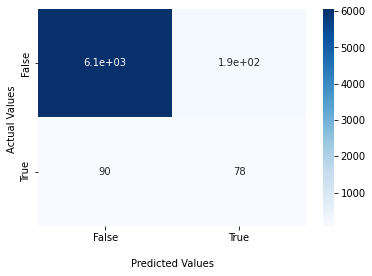

In [148]:
#1:4 balancing
cf_matrix = confusion_matrix(y_test, pred1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

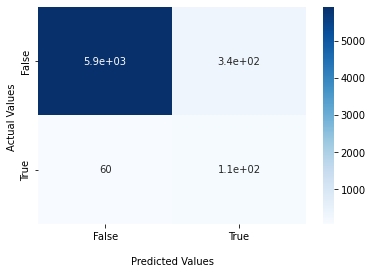

In [149]:
#1:3 balancing
cf_matrix = confusion_matrix(y_test, pred2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

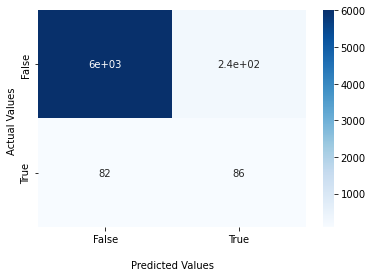

In [150]:
#1:2 balancing
cf_matrix = confusion_matrix(y_test, pred3)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])